# Script to Analyze Translated dataset and Seed Dataset and perform EDA

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Datasets 
 1. Translated Sinhala Dataset
 2. Manually Annotated Seed Dataset
 3. English SQuAD v1.0 

In [3]:
# Sinhala Datasets
train = pd.read_csv(r'D:\Desktop\FY\FYP\QA_Translator\Notebooks_v1\data\train.csv') # Translated Train set
test = pd.read_csv(r'D:\Desktop\FY\FYP\QA_Translator\Notebooks_v1\data\test.csv') # Translated Test set
dev = pd.read_csv(r'D:\Desktop\FY\FYP\QA_Translator\Notebooks_v1\data\dev.csv') # Translated Dev set
Seed = pd.read_csv(r'D:\Desktop\FY\FYP\QA_Translator\SEEDData.csv') # Seed dataset

In [4]:
# SQuAD v1.0 
En_df = pd.read_csv(r'D:\Desktop\FY\FYP\QA_Translator\Notebooks_v1\data\SQUAD_data.csv')

In [5]:
#  Adjust SQuAD to easy for analysis
En_df = En_df.dropna()
En_df = En_df.replace('', np.nan)
En_df = En_df.dropna()
En_df = En_df[En_df.astype(str).apply(lambda x: x.str.len().gt(0)).all(axis=1)]

### SHapes of dataset 

In [6]:
# shapes of dataset
train.shape, test.shape, dev.shape, En_df.shape, Seed.shape

((13500, 6), (1250, 10), (1250, 6), (87596, 5), (304, 5))

### Print datasets

In [7]:
train.head(5)

,Index,id,context,question,answer_text,answer_start
0,23174,56d9b69cdc89441400fdb728,කොයෝට් සහ විශාල බළලුන් ද බල්ලන්ට පහර දෙන බව දන...,බල්ලන් අනුභව කරන උරග වර්ග මොනවාද?,කිඹුලන් සහ පිඹුරන්,415
1,15815,572fd2b4b2c2fd14005684b5,පළමු නාවික සටන් කිහිපය රෝමයට ව්යසනකාරී විය. කෙ...,රෝමවරුන්ට එරෙහිව කිහිප වතාවක් පරාජයට පත්වීමෙන්...,සැන්තිපස්,344
2,32102,570c6902fed7b91900d459bb,වෝල්ටර්ගේ මරණයෙන් පසු නොර්විච් හි බිෂොප් සහ ඔහ...,ජෝන් ඩි ග්රේට ඔවුන්ගේ සහයෝගය වෙනස් කිරීමට ජෝන්...,කැන්ටබරි පරිච්ඡේදය,566
3,22806,56d29d4659d6e41400146144,මහායාන සූත්ර යනු මහායාන බෞද්ධ සම්ප්රදාය විසින්...,බුදුන් වහන්සේගේ මුල් ඉගැන්වීම් ලෙස සැලකෙන්නේ ම...,මහායාන සූත්ර,0
4,13725,572ee9b1dfa6aa1500f8d4cb,ක්රි.ව. 208 දී රතු කඳු බෑවුම්වල නාවික සටනේදී ක...,ක්රිස්තු වර්ෂ 208 දී රතු කඳු බෑවුම් සටනේදී පරා...,කාඕ,45


In [7]:
dev.head(5)

,Index,id,context,question,answer_text,answer_start
0,31226,570b38466b8089140040f814,"1689 සිට, උතුරු ඇමරිකාව පාලනය කිරීම සඳහා මහා බ...",ප්රංශ සහ ඉන්දියානු යුද්ධයේදී සටන් කළ අනාගත ඇමර...,ජෝර්ජ් වොෂින්ටන්,371
1,37977,56e17e6ee3433e1400422f7f,ගැටලුවක් සහ අවස්ථාවක් අතර වෙනස තවදුරටත් උද්දීප...,සංචාරක විකුණුම්කරුගේ ගැටලුව ජර්මනියේ විශාලතම න...,2000,167
2,1375,57277421708984140094ddf7,1456 දී ඔටෝමන්වරුන්ට එරෙහිව බෙල්ග්රේඩ් වටලෑමේද...,බෙල්ග්රේඩ් වැටලීමේදී මුස්ලිම්වරුන්ට එරෙහිව සටන...,කැපිස්ට්රානෝහි ශාන්ත ජෝන්,203
3,11434,572ac29334ae481900deacc4,බොහෝ විශ්ලේෂණයන් කෙරීගේ ඡන්ද වාර්තාව සෙනෙට් ප්...,කෙරී &#39;ඉහළම සෙනෙට් ලිබරල්&#39; ලෙස හැඳින්වූ...,2003,201
4,12275,57316d8b05b4da19006bd144,ගඩාෆි රාජාණ්ඩුව විවේචනය කරමින් පෙළපාලි සංවිධාන...,ගඩාෆි සභාවෙන් පන්නා දැමූ පසු ඔහු ගියේ කොහේද?,මිස්රාටා,334


In [8]:
test.head(5)

,Index,id,context,question,answer_text,answer_start,question_type,question_length,context_length,answer_length
0,17322,57309733396df919000961dc,බොහෝ ගුවන්තොටුපළවල් එම ස්ථානයේදීම රූගත කිරීම් ...,"ගොඩබිම, රූගත කිරීම් කළ හැක්කේ කොහේද?",සියලුම පොදු ප්රදේශ,149,Where,6,104,3
1,4765,5727784ff1498d1400e8f902,ඩිමොක්රටික් පක්ෂය ව්යවස්ථාදායකයට සහ ආණ්ඩුකාර ධ...,ද්විවාර්ගික ජනතාවාදී එකමුතුවක් ආණ්ඩුකාර ධුරය ල...,1896,142,Which,9,75,1
2,2693,5726aefadd62a815002e8cec,"1500 ගණන්වලදී, ගැලන් ප්රසිද්ධියේ විවේචනය කළ පළ...",1500 ගණන්වල ගැලන් විවේචනය කළේ කවුද?,පැරසෙල්සස්,58,Who,6,141,1
3,26567,56e963a699e8941900975f8b,"2009-10 පාසල් වර්ෂය තුළ, බර්න්හි පන්තිවලට සහභා...",ප්රාථමික පන්ති කීයක් තිබුණාද?,266,316,How much,4,105,1
4,7213,5727e51fff5b5019007d97be,"විධායක ශාඛාව ආණ්ඩුකාරවරයා, ඔවුන්ගේ කාර්ය මණ්ඩල...",විධායක අංශයේ කවුද ඉන්නේ?,"ආණ්ඩුකාරවරයා, ඔවුන්ගේ කාර්ය මණ්ඩලය සහ අනෙකුත් ...",13,Who,4,78,10


In [9]:
Seed.head(5)  # seed dataset

,id,context,question,answer_text,answer_start
0,0083f5e20c024f32967a1b52,පවතින අයහපත් කාලගුණය හේතුවෙන් දිවයිනේ දිස්ත්‍ර...,කුමන ප්‍රාදේශීය ලේකම් කොට්ඨාස වලට නායයාමේ අනතු...,"ගාල්ල දිස්ත්‍රික්කයේ නෙළුව, ඇල්පිටිය, නාගොඩ, ය...",184
1,0083f5e20c024f32967a1b52_2,පවතින අයහපත් කාලගුණය හේතුවෙන් දිවයිනේ දිස්ත්‍ර...,නායයාමේ අනතුරු ඇඟවීමේ නිවේදනයක් කවර කාලය සඳහා ...,16 දින රාත්‍රි 7.30 සිට 17 රාත්‍රී 7.30,384
2,008d93af0df641b5bad457ce,වෙසක් සිරි නැරඹීම සඳහා පිරිසක් සමඟ යමින් සිටි ...,වෙසක් සිරි නරඹීම සඳහා ගිය පුද්ගලයාට පිහි ඇන සි...,ඔරුගොඩවත්ත,57
3,008d93af0df641b5bad457ce_2,වෙසක් සිරි නැරඹීම සඳහා පිරිසක් සමඟ යමින් සිටි ...,ඝාතනයට ලක්වූ පුද්ගලයාගේ නම කුමක්ද?,ලුක්ශාන්,264
4,018419bf18804ef2816abad0,කොළඹ පාරිභෝගික මිල දර්ශකය අනුව උද්ධමන අනුපාතය ...,අගෝස්තු මාසයේ කොළඹ උද්ධමන අනුපාතය කීයද?,0.5,64


In [10]:
En_df.head(5)  # SQuAD v1.0

,id,context,question,answer_text,answer_start
0,5733be284776f41900661182,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,Saint Bernadette Soubirous,515
1,5733be284776f4190066117f,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,a copper statue of Christ,188
2,5733be284776f41900661180,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,the Main Building,279
3,5733be284776f41900661181,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,a Marian place of prayer and reflection,381
4,5733be284776f4190066117e,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,a golden statue of the Virgin Mary,92


In [11]:
# Computes the total and unique word count in the context passages of a DataFrame.

def count_words_in_context(df, context_column='context'):
    # Concatenate all context passages into one large string
    all_text = " ".join(df[context_column].astype(str))
    
    # Tokenize by whitespace
    all_words = all_text.split()
    
    total_words = len(all_words)
    unique_words = len(set(all_words))
    
    print(f"Total Words in Contexts: {total_words}")
    print(f"Unique Words in Contexts: {unique_words}")
    
    return {
        'total_words': total_words,
        'unique_words': unique_words
    }

### Word count Analysis

In [12]:
print("Train Set Context Word Count:")  
counts = count_words_in_context(train)
print("\nTest Set Context Word Count:")
counts = count_words_in_context(test)
print("\nDev Set Context Word Count:")
counts = count_words_in_context(dev)
print("\nSeed Context Word Count:")
counts = count_words_in_context(Seed)

Train Set Context Word Count:
Total Words in Contexts: 1328209
Unique Words in Contexts: 52896

Test Set Context Word Count:
Total Words in Contexts: 123008
Unique Words in Contexts: 20190

Dev Set Context Word Count:
Total Words in Contexts: 122676
Unique Words in Contexts: 20309

Seed Context Word Count:
Total Words in Contexts: 26035
Unique Words in Contexts: 5857


### Question Type Analysis

In [13]:
# Sample question words for each type taken from translated and Seed datasets
question_types = {
    "What": ["කුමක්ද", "මොනවාද", "කුමක්", "මොනවා", "කුමකට", "කුමක"],
    "When": ["කවදාද", "කවදා", "කෙදිනද"],
    "Where": ["කොයි", "කොහේද", "කොතැනින්ද"],
    "Why": ["ඇයි"],
    "How much": ["කීය ද", "කීයකට", "කොච්චර", "කීයක්", "කොපමණ", "කෙතරම්", "කොතරම්", "කොහොමද", "කෙසේ", "කී"],
    "Which": ["කවර", "කුමන", "මොන"],
    "Who": ["කවුද", "කාටද", "කා", "කාගේ", "කවුරුන්"]
}

In [14]:
# Function to determine question type based on keywords appearing anywhere in the question
def get_question_type(question: str):
    for q_type, keywords in question_types.items():
        for keyword in keywords:
            if keyword in question:  # Check if keyword appears anywhere in the question
                return q_type
    return "Other"  # Return "Other" if no match is found

# Function to add question type and calculate counts/percentages
def classify_questions(data: pd.DataFrame):
    # Apply the function to classify question types
    data['question_type'] = data['question'].apply(get_question_type)

    # Count the occurrences of each question type
    count_per_type = data['question_type'].value_counts()

    # Calculate the percentage of each question type
    percentage_per_type = (count_per_type / len(data)) * 100

    # Create a results DataFrame with count and percentage
    result = pd.DataFrame({
        'question_type': count_per_type.index,  # Convert index to a column
        'count': count_per_type.values,
        'percentage': percentage_per_type.values
    })

    # # Print the summary results
    # print(result)
    
    return result

In [15]:
print('Translated Train set')
classify_questions(train)

Translated Train set


,question_type,count,percentage
0,What,5175,38.333333
1,Which,3023,22.392593
2,How much,1744,12.918519
3,Who,1638,12.133333
4,When,1030,7.629630
5,Where,419,3.103704
6,Other,393,2.911111
7,Why,78,0.577778


In [16]:
print('Translated dev set')
classify_questions(dev)

Translated dev set


,question_type,count,percentage
0,What,458,36.64
1,Which,287,22.96
2,How much,171,13.68
3,Who,139,11.12
4,When,103,8.24
5,Other,40,3.20
6,Where,37,2.96
7,Why,15,1.20


In [17]:
print('Translated Test set')
classify_questions(test)

Translated Test set


,question_type,count,percentage
0,What,450,36.00
1,Which,298,23.84
2,How much,178,14.24
3,Who,154,12.32
4,When,102,8.16
5,Where,34,2.72
6,Other,30,2.40
7,Why,4,0.32


In [19]:
print('Seed dataset')
classify_questions(Seed)

Seed dataset


,question_type,count,percentage
0,What,110,36.184211
1,Which,75,24.671053
2,How much,43,14.144737
3,Who,35,11.513158
4,When,21,6.907895
5,Other,18,5.921053
6,Why,1,0.328947
7,Where,1,0.328947


### Length Analysis of Questions, Answers and Context

In [20]:
def compute_lengths(df, question_col, context_col, answer_start_col, answer_text_col):
    # Question Length (in words)
    df['question_length'] = df[question_col].apply(lambda x: len(x.split()))
    
    # Context Length (in words)
    df['context_length'] = df[context_col].apply(lambda x: len(x.split()))
    
    # Answer Length (in words)
    df['answer_length'] = df.apply(lambda row: len(row[answer_text_col].split()) if pd.notna(row[answer_text_col]) else 0, axis=1)

    return df

In [22]:
test = compute_lengths(test, 'question', 'context', 'answer_start', 'answer_text')
train = compute_lengths(train, 'question', 'context', 'answer_start', 'answer_text')
dev = compute_lengths(dev, 'question', 'context', 'answer_start', 'answer_text')
seed = compute_lengths(Seed, 'question', 'context', 'answer_start', 'answer_text')
en_df = compute_lengths(En_df, 'question', 'context', 'answer_start', 'answer_text')    

In [23]:
test_stats = test[['question_length', 'context_length', 'answer_length']].describe()
train_stats = train[['question_length', 'context_length', 'answer_length']].describe()
dev_stats = dev[['question_length', 'context_length', 'answer_length']].describe()
seed_stats = seed[['question_length', 'context_length', 'answer_length']].describe()
en_stats = en_df[['question_length', 'context_length', 'answer_length']].describe()

In [24]:
print("\nTest Dataset Stats:\n", test_stats)
print("\nTrain Dataset Stats:\n", train_stats)
print("\nDev Dataset Stats:\n", dev_stats)  
print("\nSeed Dataset Stats:\n", seed_stats)  # Uncomment if seed dataset is available
print("\nEnglish Dataset Stats:\n", en_stats)


Test Dataset Stats:
        question_length  context_length  answer_length
count      1250.000000     1250.000000    1250.000000
mean          8.604000       98.406400       2.288800
std           3.054218       37.637855       1.963384
min           3.000000       13.000000       1.000000
25%           6.000000       77.000000       1.000000
50%           8.000000       92.000000       2.000000
75%          10.000000      116.000000       3.000000
max          28.000000      285.000000      23.000000

Train Dataset Stats:
        question_length  context_length  answer_length
count     13500.000000    13500.000000   13500.000000
mean          8.620667       98.385852       2.263852
std           3.110176       38.199351       1.902236
min           2.000000        9.000000       1.000000
25%           6.000000       76.000000       1.000000
50%           8.000000       92.000000       2.000000
75%          10.000000      115.000000       3.000000
max          33.000000      393.00000

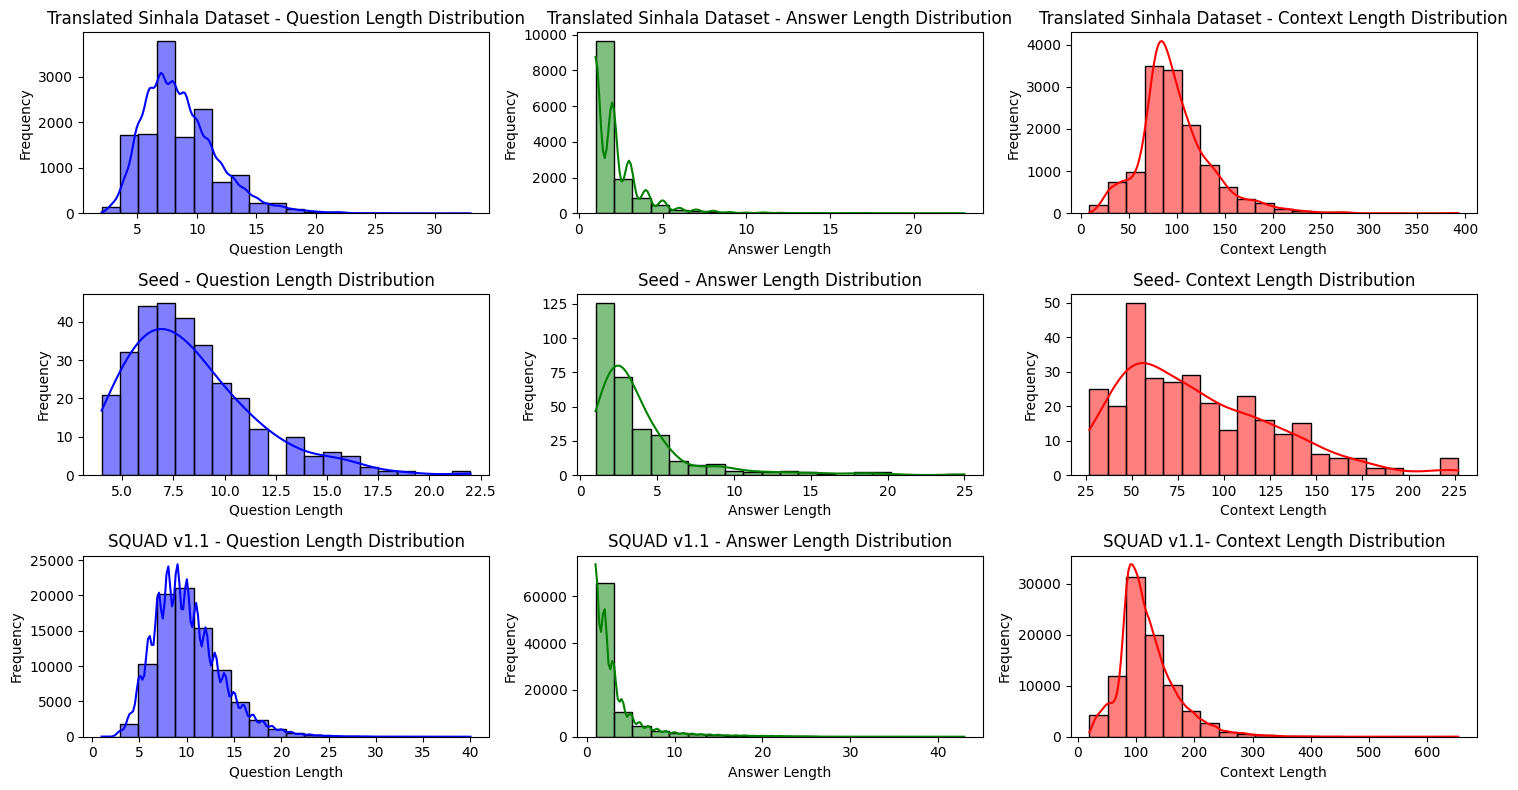

In [26]:
# plot setup
plt.figure(figsize=(15, 8))

# Plot Train Dataset - Question Length Distribution
plt.subplot(3, 3, 1)
sns.histplot(train['question_length'], bins=20, kde=True, color='blue')
plt.title("Translated Sinhala Dataset - Question Length Distribution")
plt.xlabel("Question Length")
plt.ylabel("Frequency")

# Plot Train Dataset - Answer Length Distribution
plt.subplot(3, 3, 2)
sns.histplot(train['answer_length'].apply(lambda x: sum(x) if isinstance(x, list) else x), bins=20, kde=True, color='green')
plt.title("Translated Sinhala Dataset - Answer Length Distribution")
plt.xlabel("Answer Length")
plt.ylabel("Frequency")

# Plot Train Dataset - Context Length Distribution
plt.subplot(3, 3, 3)
sns.histplot(train['context_length'], bins=20, kde=True, color='red')
plt.title("Translated Sinhala Dataset - Context Length Distribution")
plt.xlabel("Context Length")
plt.ylabel("Frequency")


# Plot seed Dataset - Question Length Distribution
plt.subplot(3, 3, 4)
sns.histplot(seed['question_length'], bins=20, kde=True, color='blue')
plt.title("Seed - Question Length Distribution")
plt.xlabel("Question Length")
plt.ylabel("Frequency")

# Plot seed Dataset - Answer Length Distribution
plt.subplot(3, 3, 5)
sns.histplot(seed['answer_length'].apply(lambda x: sum(x) if isinstance(x, list) else x), bins=20, kde=True, color='green')
plt.title("Seed - Answer Length Distribution")
plt.xlabel("Answer Length")
plt.ylabel("Frequency")

# Plot seed Dataset - Context Length Distribution
plt.subplot(3, 3, 6)
sns.histplot(seed['context_length'], bins=20, kde=True, color='red')
plt.title("Seed- Context Length Distribution")
plt.xlabel("Context Length")
plt.ylabel("Frequency")

# Plot English Dataset - Question Length Distribution
plt.subplot(3, 3, 7)
sns.histplot(en_df['question_length'], bins=20, kde=True, color='blue')
plt.title("SQUAD v1.1 - Question Length Distribution")
plt.xlabel("Question Length")
plt.ylabel("Frequency")

# Plot English Dataset - Answer Length Distribution
plt.subplot(3, 3, 8)
sns.histplot(en_df['answer_length'].apply(lambda x: sum(x) if isinstance(x, list) else x), bins=20, kde=True, color='green')
plt.title("SQUAD v1.1 - Answer Length Distribution")
plt.xlabel("Answer Length")
plt.ylabel("Frequency")

# Plot English Dataset - Context Length Distribution
plt.subplot(3, 3, 9)
sns.histplot(en_df['context_length'], bins=20, kde=True, color='red')
plt.title("SQUAD v1.1- Context Length Distribution")
plt.xlabel("Context Length")
plt.ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [27]:
# Mean difference between English and Sinhala for question, context, and answer lengths
mean_diff_question = en_df['question_length'].mean() - train['question_length'].mean()
mean_diff_context = en_df['context_length'].mean() - train['context_length'].mean()
mean_diff_answer = en_df['answer_length'].mean() - train['answer_length'].mean()

print("Mean Difference in Lengths:")
print(f"Question Length: {mean_diff_question}")
print(f"Context Length: {mean_diff_context}")
print(f"Answer Length: {mean_diff_answer}")

Mean Difference in Lengths:
Question Length: 1.4403977654991849
Context Length: 21.376979784295912
Answer Length: 0.898381583464829


In [29]:
# Mean difference between translated datasets and seed dataset for question, context, and answer lengths
mean_diff_question = train['question_length'].mean() - seed['question_length'].mean()
mean_diff_context = train['context_length'].mean() - seed['context_length'].mean()
mean_diff_answer = train['answer_length'].mean() - seed['answer_length'].mean()

print("Mean Difference in Lengths:")
print(f"Question Length: {mean_diff_question}")
print(f"Context Length: {mean_diff_context}")
print(f"Answer Length: {mean_diff_answer}")

Mean Difference in Lengths:
Question Length: 0.31803508771929856
Context Length: 12.744404483430799
Answer Length: -1.584832358674464


### Summary stats

In [30]:
question_count = train['question'].nunique()
context_count = train['context'].nunique()
answer_count = train['answer_text'].nunique()

print(f"Number of unique questions: {question_count}")
print(f"Number of unique contexts: {context_count}")
print(f"Number of unique answers: {answer_count}")

Number of unique questions: 13472
Number of unique contexts: 5911
Number of unique answers: 10370


In [31]:
question_count = test['question'].nunique()
context_count = test['context'].nunique()
answer_count = test['answer_text'].nunique()

print(f"Number of unique questions: {question_count}")
print(f"Number of unique contexts: {context_count}")
print(f"Number of unique answers: {answer_count}")

Number of unique questions: 1250
Number of unique contexts: 1136
Number of unique answers: 1176


In [32]:
question_count = dev['question'].nunique()
context_count = dev['context'].nunique()
answer_count = dev['answer_text'].nunique()

print(f"Number of unique questions: {question_count}")
print(f"Number of unique contexts: {context_count}")
print(f"Number of unique answers: {answer_count}")

Number of unique questions: 1250
Number of unique contexts: 1141
Number of unique answers: 1173


In [33]:
question_count = Seed['question'].nunique()
context_count = Seed['context'].nunique()
answer_count = Seed['answer_text'].nunique()

print(f"Number of unique questions: {question_count}")
print(f"Number of unique contexts: {context_count}")
print(f"Number of unique answers: {answer_count}")

Number of unique questions: 302
Number of unique contexts: 187
Number of unique answers: 301


In [34]:
# Function to plot question type distribution
def plot_question_type_distribution(data):

    df = pd.DataFrame(data)

    # Create the figure
    plt.figure(figsize=(4, 3))

    # Plot with seaborn
    ax = sns.barplot(x='question_type', y='percentage', data=df, palette='seismic', width=0.7)

    # Customize aesthetics
    plt.title('Question Type Distribution', fontsize=10, fontweight='bold')
    plt.xlabel('Question Type', fontsize=7, fontweight='bold')
    plt.ylabel('Percentage (%)', fontsize=7, fontweight='bold')
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    sns.despine()
    plt.tight_layout()
    plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_10172\3051893508.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='question_type', y='percentage', data=df, palette='seismic', width=0.7)


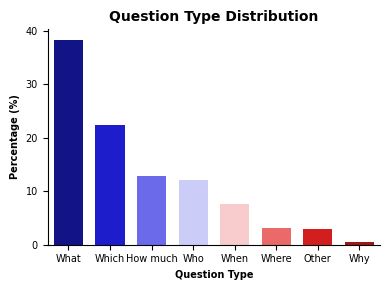

In [35]:
train_data = {
    'question_type': ['What', 'Which', 'How much', 'Who', 'When', 'Where', 'Other', 'Why'],
    'count': [5175, 3023, 1744, 1638, 1030, 419, 393, 78],
    'percentage': [38.33, 22.39, 12.92, 12.13, 7.63, 3.10, 2.91, 0.58]
}

plot_question_type_distribution(train_data)

C:\Users\MSI\AppData\Local\Temp\ipykernel_10172\3051893508.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='question_type', y='percentage', data=df, palette='seismic', width=0.7)


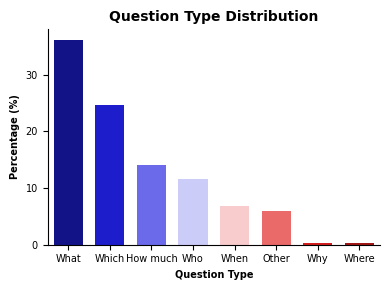

In [36]:
Seed_data = {
    'question_type': ['What', 'Which', 'How much', 'Who', 'When', 'Other', 'Why', 'Where'],
    'count': [110, 75, 43, 35, 21, 18, 1, 1],
    'percentage': [36.18, 24.67, 14.14, 11.51, 6.91, 5.92, 0.33, 0.33]
}

plot_question_type_distribution(Seed_data)